In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("hepatitis_csv.csv")
#print(df.head())
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
df['class'] = df['class'].replace({'live': 1, 'die': 0})
df= df.replace({True:1 , False:0})
print(df.head())



   age  sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
0   30    1      0.0           0      0.0      0.0       0.0        0.0   
1   50    0      0.0           0      1.0      0.0       0.0        0.0   
2   78    0      1.0           0      1.0      0.0       0.0        1.0   
3   31    0      NaN           1      0.0      0.0       0.0        1.0   
4   34    0      1.0           0      0.0      0.0       0.0        1.0   

   liver_firm  spleen_palpable  spiders  ascites  varices  bilirubin  \
0         0.0              0.0      0.0      0.0      0.0        1.0   
1         0.0              0.0      0.0      0.0      0.0        0.9   
2         0.0              0.0      0.0      0.0      0.0        0.7   
3         0.0              0.0      0.0      0.0      0.0        0.7   
4         0.0              0.0      0.0      0.0      0.0        1.0   

   alk_phosphate   sgot  albumin  protime  histology  class  
0           85.0   18.0      4.0      NaN          0  

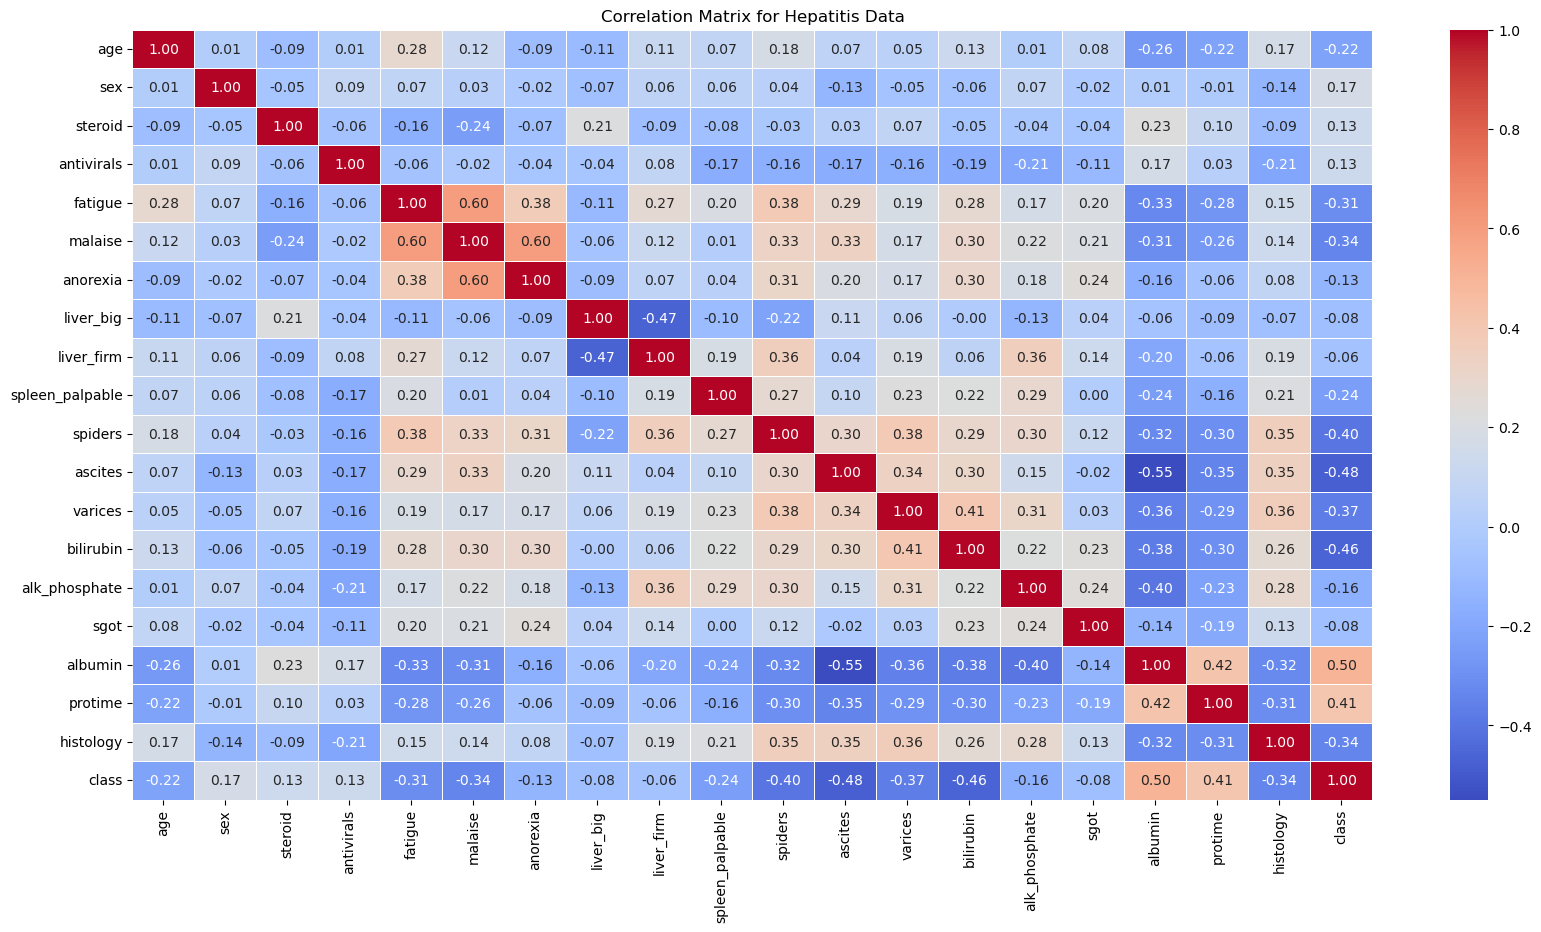

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Hepatitis Data')
plt.show()

In [32]:
threshold = 0.1
columns_to_drop = set()

for i in range(len(correlation_matrix.columns)):
    if abs(correlation_matrix.loc['class', correlation_matrix.columns[i]]) < threshold:
        colname = correlation_matrix.columns[i]
        columns_to_drop.add(colname)

df_cleaned = df.drop(columns=columns_to_drop)
print(df_cleaned.head())

   age  sex  steroid  antivirals  fatigue  malaise  anorexia  spleen_palpable  \
0   30    1      0.0           0      0.0      0.0       0.0              0.0   
1   50    0      0.0           0      1.0      0.0       0.0              0.0   
2   78    0      1.0           0      1.0      0.0       0.0              0.0   
3   31    0      NaN           1      0.0      0.0       0.0              0.0   
4   34    0      1.0           0      0.0      0.0       0.0              0.0   

   spiders  ascites  varices  bilirubin  alk_phosphate  albumin  protime  \
0      0.0      0.0      0.0        1.0           85.0      4.0      NaN   
1      0.0      0.0      0.0        0.9          135.0      3.5      NaN   
2      0.0      0.0      0.0        0.7           96.0      4.0      NaN   
3      0.0      0.0      0.0        0.7           46.0      4.0     80.0   
4      0.0      0.0      0.0        1.0            NaN      4.0      NaN   

   histology  class  
0          0      1  
1          0

In [33]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    int64  
 2   steroid          154 non-null    float64
 3   antivirals       155 non-null    int64  
 4   fatigue          154 non-null    float64
 5   malaise          154 non-null    float64
 6   anorexia         154 non-null    float64
 7   spleen_palpable  150 non-null    float64
 8   spiders          150 non-null    float64
 9   ascites          150 non-null    float64
 10  varices          150 non-null    float64
 11  bilirubin        149 non-null    float64
 12  alk_phosphate    126 non-null    float64
 13  albumin          139 non-null    float64
 14  protime          88 non-null     float64
 15  histology        155 non-null    int64  
 16  class            155 non-null    int64  
dtypes: float64(12), 

In [37]:
columns_to_check = ['steroid', 'fatigue', 'malaise', 'anorexia' ,'spleen_palpable','spiders','ascites','varices','bilirubin']
df_cleaned = df_cleaned.dropna(subset=columns_to_check)
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 154
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              144 non-null    int64  
 1   sex              144 non-null    int64  
 2   steroid          144 non-null    float64
 3   antivirals       144 non-null    int64  
 4   fatigue          144 non-null    float64
 5   malaise          144 non-null    float64
 6   anorexia         144 non-null    float64
 7   spleen_palpable  144 non-null    float64
 8   spiders          144 non-null    float64
 9   ascites          144 non-null    float64
 10  varices          144 non-null    float64
 11  bilirubin        144 non-null    float64
 12  alk_phosphate    121 non-null    float64
 13  albumin          134 non-null    float64
 14  protime          86 non-null     float64
 15  histology        144 non-null    int64  
 16  class            144 non-null    int64  
dtypes: float64(12), int64

In [42]:
mean_alk_phosphate = df_cleaned['alk_phosphate'].mean()
mean_albumin = df_cleaned['albumin'].mean()
mean_protime = df_cleaned['protime'].mean()

df_cleaned['alk_phosphate'].fillna(mean_alk_phosphate, inplace=True)
df_cleaned['albumin'].fillna(mean_albumin, inplace=True)
df_cleaned['protime'].fillna(mean_protime, inplace=True)

print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 154
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              144 non-null    int64  
 1   sex              144 non-null    int64  
 2   steroid          144 non-null    float64
 3   antivirals       144 non-null    int64  
 4   fatigue          144 non-null    float64
 5   malaise          144 non-null    float64
 6   anorexia         144 non-null    float64
 7   spleen_palpable  144 non-null    float64
 8   spiders          144 non-null    float64
 9   ascites          144 non-null    float64
 10  varices          144 non-null    float64
 11  bilirubin        144 non-null    float64
 12  alk_phosphate    144 non-null    float64
 13  albumin          144 non-null    float64
 14  protime          144 non-null    float64
 15  histology        144 non-null    int64  
 16  class            144 non-null    int64  
dtypes: float64(12), int64

In [43]:
numpy_array = df_cleaned.to_numpy()

In [44]:
print(numpy_array)

[[30.          1.          0.         ... 61.95348837  0.
   1.        ]
 [50.          0.          0.         ... 61.95348837  0.
   1.        ]
 [78.          0.          1.         ... 61.95348837  0.
   1.        ]
 ...
 [61.          0.          0.         ... 61.95348837  1.
   1.        ]
 [53.          1.          0.         ... 48.          1.
   1.        ]
 [43.          0.          1.         ... 42.          1.
   0.        ]]


In [46]:
df_test =df_cleaned.sample(frac=0.3,random_state = 1)
df_train = df.drop(df_test.index)
print(df_test.info())
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 103 to 39
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              43 non-null     int64  
 1   sex              43 non-null     int64  
 2   steroid          43 non-null     float64
 3   antivirals       43 non-null     int64  
 4   fatigue          43 non-null     float64
 5   malaise          43 non-null     float64
 6   anorexia         43 non-null     float64
 7   spleen_palpable  43 non-null     float64
 8   spiders          43 non-null     float64
 9   ascites          43 non-null     float64
 10  varices          43 non-null     float64
 11  bilirubin        43 non-null     float64
 12  alk_phosphate    43 non-null     float64
 13  albumin          43 non-null     float64
 14  protime          43 non-null     float64
 15  histology        43 non-null     int64  
 16  class            43 non-null     int64  
dtypes: float64(12), int64